# Определение закономерностей для успешной компьютерной игры

 **Цель проекта:**

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План проекта:**
1. Изучение общей информации по данным файла.

2. Предобработка данных: 
   - поиск пропущенных значений;
   - заполнение пропущенных значений, где возможно;
   - определение типа данных и в случае необходимости изменение на более подходящий;
   - проверка на дубликаты и их обработка.

3. Исследовательский анализ данных:
   - количество игр в разные годы
   - изучение наиболее популярных платформ
   - влиянение на продажи отзывов пользователей и критиков
   - распределение игр по жанрам

4. Изучение портрета пользователя каждого региона (Северная Америка, Европа, Япония)

5. Проверка гипотез:
   - средние пользовательские рейтинги платформ Xbox One и PC одинаковы
   - средние пользовательские рейтинги жанров Action и Sports разные

## Изучение общей информации по данным файла

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# ознакомимся с файлом
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head() # выведем первые пять строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


На первый взгляд требуются следующая работа для предобработки данных:
- приведение к нижнему регистру названия столбцов;
- заполнение пропусков по возможности в столбцах: Name, Year_of_Release, Critic_Score, User_Score, Rating
- изменение типа данных для столбцов: Year_of_Release, User_Score

## Предобработка данных

### Замена названия столбцов

In [4]:
games = games.rename(columns={
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
})
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Пропущенные данные

In [5]:
games.isna().sum() # посчитаем количество пропусков в каждом столбце датафрейма

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
# проверим строки, в которых name пропущены
games_name = games[games['name'].isna()]
games_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти строки неинформативны для дальнейшего анализа, к тому же их всего две из более чем 16 тысяч строк, поэтому можем их удалить. Также у нас имеются два пропуска в столбце `genre`, как видим, это те же строки, так что удалив их мы избавимся от пропусков сразу в двух столбцах

In [7]:
games = games.dropna(subset=['name'])

Проверим, какую долю от общего количества составляют пропущенные значения в столбце `year_of_release`, если их меньше 10%, то можем их удалить, т.к. нет источников для их заполнения

In [8]:
games['year_of_release'].isna().sum()/games['year_of_release'].count()

0.016358550231087326

Думаю, можно удалить пропуски, т.к. их количество составляет менее 2%

In [9]:
games = games.dropna(subset=['year_of_release'])

**Изучим столбец `user_score`**

In [10]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди численных значений имеются пропуски `nan` и `tbd` (предполагаю, это значит to be determined, соответственно, это то же самое, что и nan)

In [11]:
games['user_score'] = games['user_score'].replace('tbd',np.NaN)

Изучив специфику рейтинга ESRB, становится ясно, что он применяется главным образом для игр, реализуемых в США и Канаде. Отсюда и отсутствие рейтинга для игр в других регионах. Поэтому, чтобы не потерять важные данные, заменим пропущенные значения на `unknown`, чтобы учесть все игры при последующем анализе.

In [12]:
games['rating'] = games['rating'].fillna('unknown')

In [13]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

### Типы данных

Изменим тип данных в столбцах `year_of_release` на `int` и `user_score` на `float`

In [14]:
games['year_of_release'] = games['year_of_release'].astype(int)

In [15]:
games['user_score'] = games['user_score'].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Обработка дубликатов

Поищем неявные дубликаты по столбцам `name`, `platform`, `year_of_release`

In [16]:
# Код ревьюера
games[games[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Строка 16230 похожа на техническую ошибку и скорее всего мы имеем дело с дубликатом строки 604, поэтому удалим строку 16230

In [17]:
games = games.drop_duplicates(subset=['name', 'platform','year_of_release'], keep='first')

In [18]:
# проверим на наличие дубликатов
games.duplicated().sum()

0

Дубликаты не обнаружены

### Cуммарные продажи во всех регионах

In [19]:
# добавим новый столбец с суммарными продажами во всех регионах
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**Вывод по предобработке данных:**

**Прежде, чем приступать к анализу данных необходимо было провести их предобработку. Были изменены названия столбцов, добавлен дополнительны столбец с общим числом продаж по всем регионам, типы данных приведены к более корректным и подходящим для проведения анализа, а также были пропуски в значениях (некоторые пришлось удалить, их число составило не более 2% от общего количества. Чтобы не потерять важные данные, связанные с рейтингом ESRB, заменили пропущенные значения на unknown, чтобы учесть все игры при последующем анализе.**


## Исследовательский анализ данных

### Количество игр в разные годы

In [20]:
%config InlineBackend.figure_format = 'retina' # улучшение четкости изображения графиков

In [21]:
matplotlib.style.use('seaborn-dark') # применим стиль matplotlib

In [22]:
games['year_of_release'].value_counts() # посмотрим количество игр в разные годы методом value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

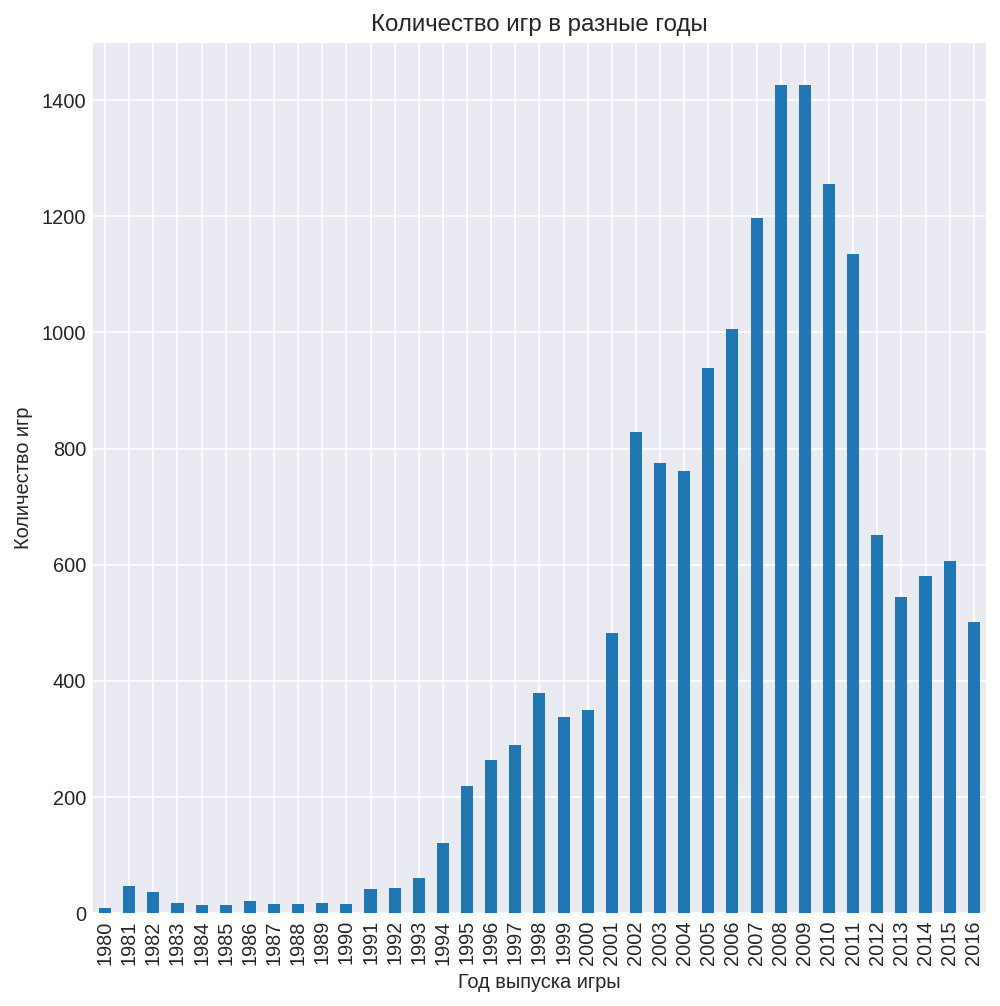

In [23]:
(games.groupby('year_of_release')['year_of_release'].agg('count')
 .plot(kind='bar', figsize=(8, 8), title='Количество игр в разные годы', grid=True))
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска игры')
plt.show()

**Вывод: данные представлены за период с 1980 по 2016 год. Гистограмма показывает, что в 80-егоды игровая индустрия была очень слабо развита, в 90-х постепенно начала расти: с 1993 по 1995 годы количество игр ежегодноо увеличивалось в два раза и продолжало расти до 1998 года, в 1999 и 2000 был небольшой спад, в 2002 был огромный скачок, невероятный по сравнению с 10-летней давностью (если сравнить с 1980 по 1990 и с 1990 по 2000). Самый большой пик развития игр относится к 2008 и 2009 годам, затем постепенно развитие компьютерных игр снижается, думаю, это связано с развитием смартфонов.**

### Платформы
Посмотрим, как менялись продажи по платформам. 

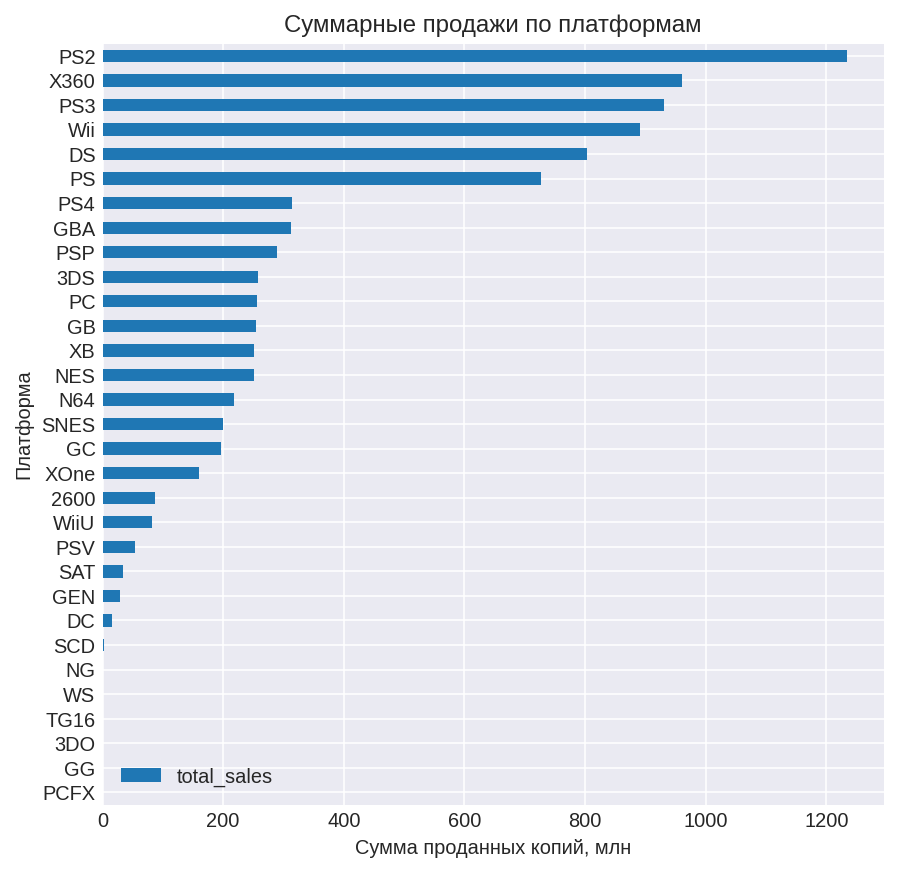

In [24]:
# воспользуемся методом pivot_table() для группировки данных по платформам
# применим функцию sum для расчета суммарных продаж каждой платформы
(
    games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales') # отсортируем по убыванию суммарных продаж
    .plot(kind='barh', figsize=(7, 7), grid=True) # отобразим данные с помощью горизонтального барплота
)
plt.title('Суммарные продажи по платформам')
plt.ylabel('Платформа')
plt.xlabel('Сумма проданных копий, млн')
plt.show()

**Самая популярная платформа PS2, было продано свыше 1,2 млрд копий по всему миру. После этой платформы идет тройка, которые продали от 850 млн до 900 млн копий, к ним относятся: X360, PS3, Wii. Еще две платформы DS и PS не сильно отстали от лидеров (750 - 800 млн копий), при этом заметно выделяются на фоне остальных.**

Посмотрим на эти шесть платформ, каким образом они продавались в разные годы, причем возьмем годы после 1995, где порог суммарных продаж преодолел 200 млн копий.

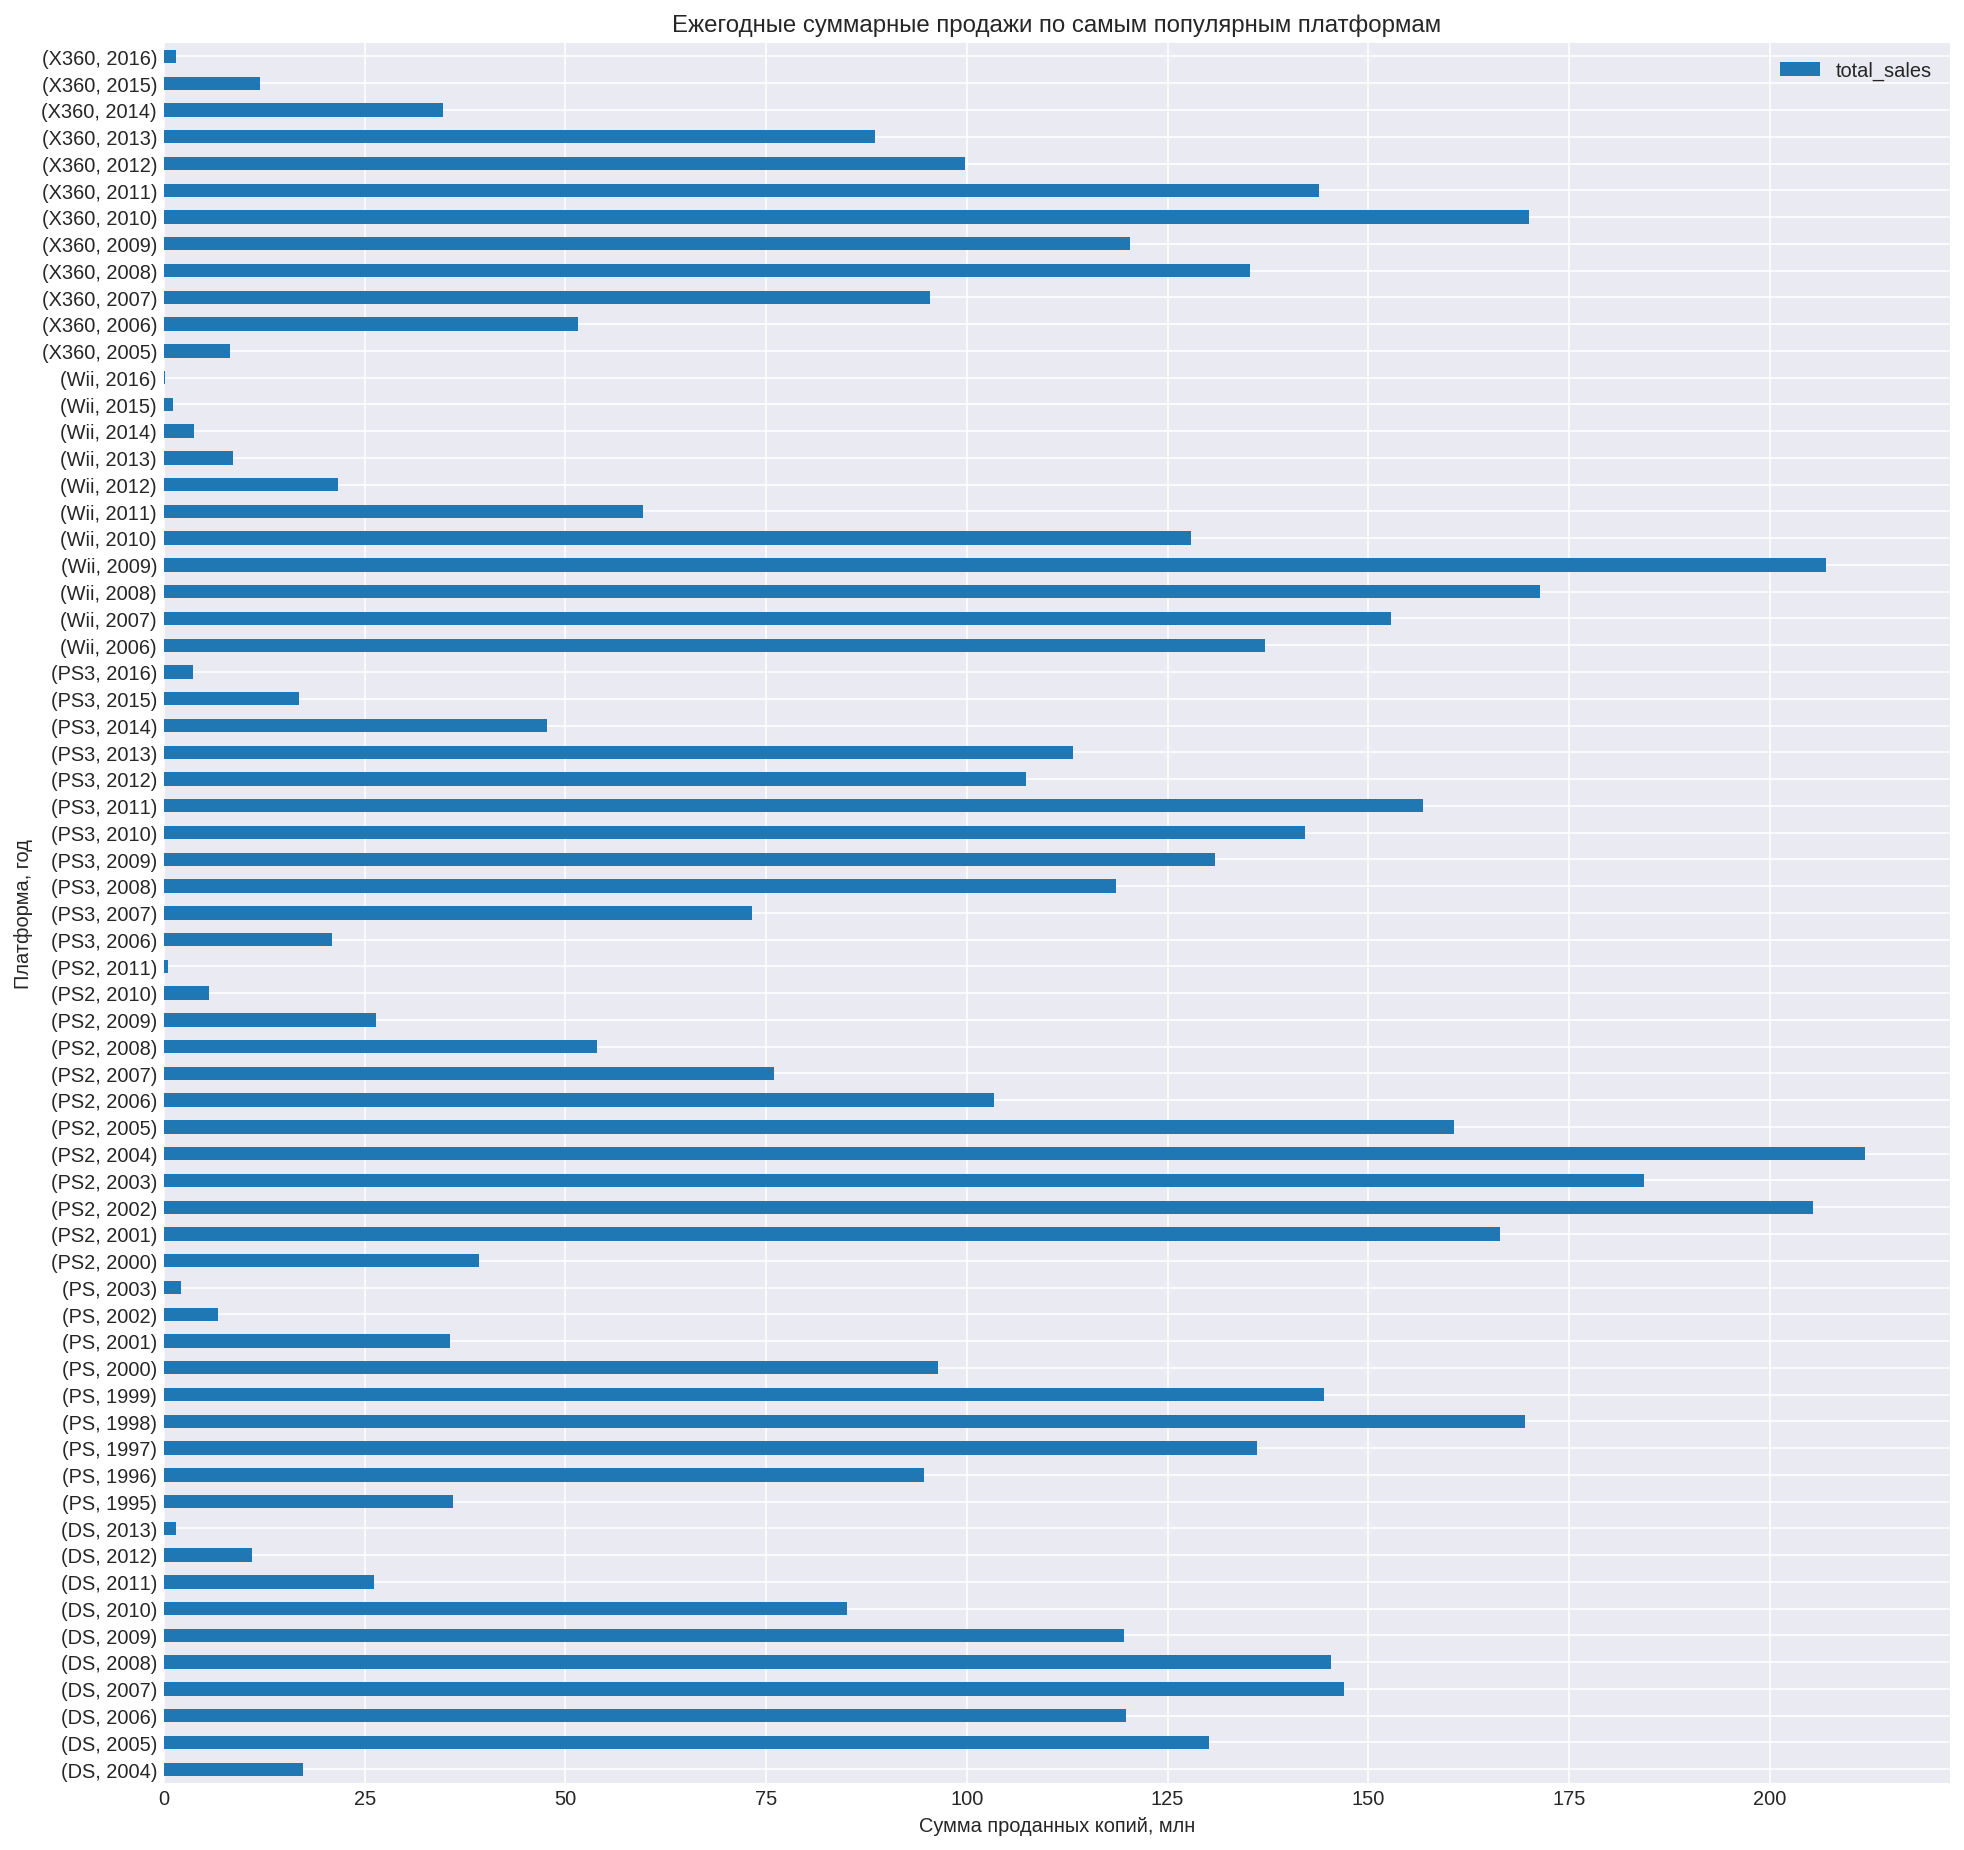

In [25]:
# сделаем сред методом query, нужны два одновременных условия
(
    games.query('year_of_release >= 1995 and platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .plot(kind='barh', figsize=(16, 16), grid=True)
)
plt.title('Ежегодные суммарные продажи по самым популярным платформам')
plt.ylabel('Платформа, год')
plt.xlabel('Сумма проданных копий, млн')
plt.show()

**Вывод: судя по распределениям шести наиболее популярных платформах, все платформы имееют тенденцию к завершению. Каждая платформа существует несколько лет, к середине своего существования имеет самую большую популярность, а в дальнейшем неминуемо теряет эту популярность и к концу практически нет продаж, на смену приходит новая версия (как в случае с PS2 и PS3). Мы видим, что пик популярности PS2 приходится на 2005 год, а в 2006 резко падает, как раз с появлением PS3 и тогда уже продажи PS3 растут. Некоторые компании стараются держать свой продукт на рынке и после небольшого падения на следующий год продажи возрастают, но обычно всего на год, максимум два. Такую картину мы наблюдаем у DS, PS2, PS3, X360.**

**В итоге DS просуществовала 10 лет, PS - 9 лет, PS2 - 12 лет, PS3 - 10 лет, Wii - 10 лет, X360 - 12 лет.
Можем сделать вывод, что даже самые популярные платформы каждые десять лет исчезают и их место занимают новые.**

Для дальнейшего анализа, а также прогноза на будущее возьмем данные за небольшой период, но достаточный для прогнозирования (минимум 2 года). Выберем 2013 - 2016 годы, т.к. в этом году был пик по суммарной продаже всех игр, а также основные лидеры были представлены в этот период в разных позициях.

### Суммарные продажи каждой платформы в период с 2013 по 2016 гг

In [26]:
games_actual = games.query('year_of_release >= 2013')

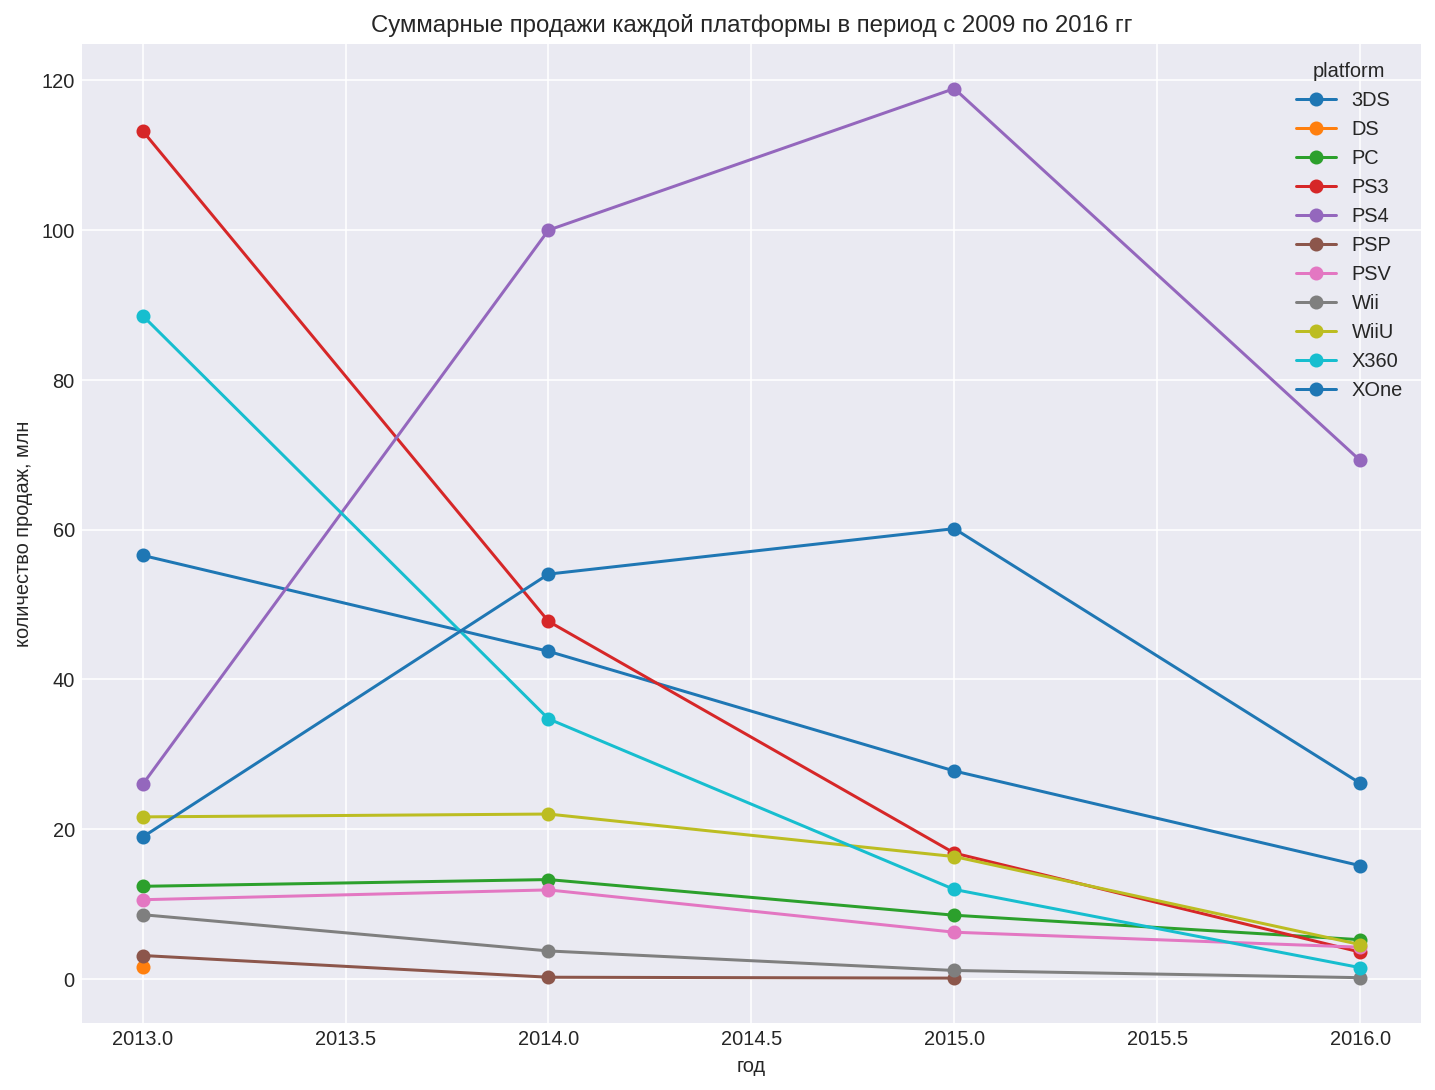

In [27]:
# построим графики суммарных каждой платформы в период с 2013 по 2016 гг

(
    games_actual
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(style='o-', grid=True, title='Суммарные продажи каждой платформы в период с 2009 по 2016 гг', \
          legend=True, figsize=(12,9), xlabel='год', ylabel='количество продаж, млн')
)
plt.show()

**Вывод: Все платформы имеют тенденцию к падению, но на 2017 год все еще должны быть в лидерах: PS4 и XOne 
(только у этих двух платформ наблюдался прирост продаж с 2013 по 2015 годы, к тому же они только в 2013 году появились, значит, есть вероятность роста на будущее, а не затухание, если учитывать предыдущее исследование, что успешная компания на рынке держится около 10 лет, возможно падение в 2016 году кратковременное или хотя бы продажи сильно не упадут в будущем).**

### Диаграмма размаха по глобальным продажам игр в разбивке по платформам

На основе предыдущего исследования для решения этой задачи возьмем следующие платформы: PS4, 3DS, WiiU, XOne

In [28]:
games_global = games_actual.query('platform in ["PS4", "XOne", "WiiU", "3DS"]')
games_global.groupby('platform')['total_sales'].describe()


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.09,0.280,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
WiiU,115.0,0.562000,1.038778,0.01,0.06,0.20,0.595,7.09
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


In [29]:
# избавимся от выбросов
games_global = games_global.query('total_sales < 1.2')

Text(0, 0.5, 'Глобальные продажи, млн')

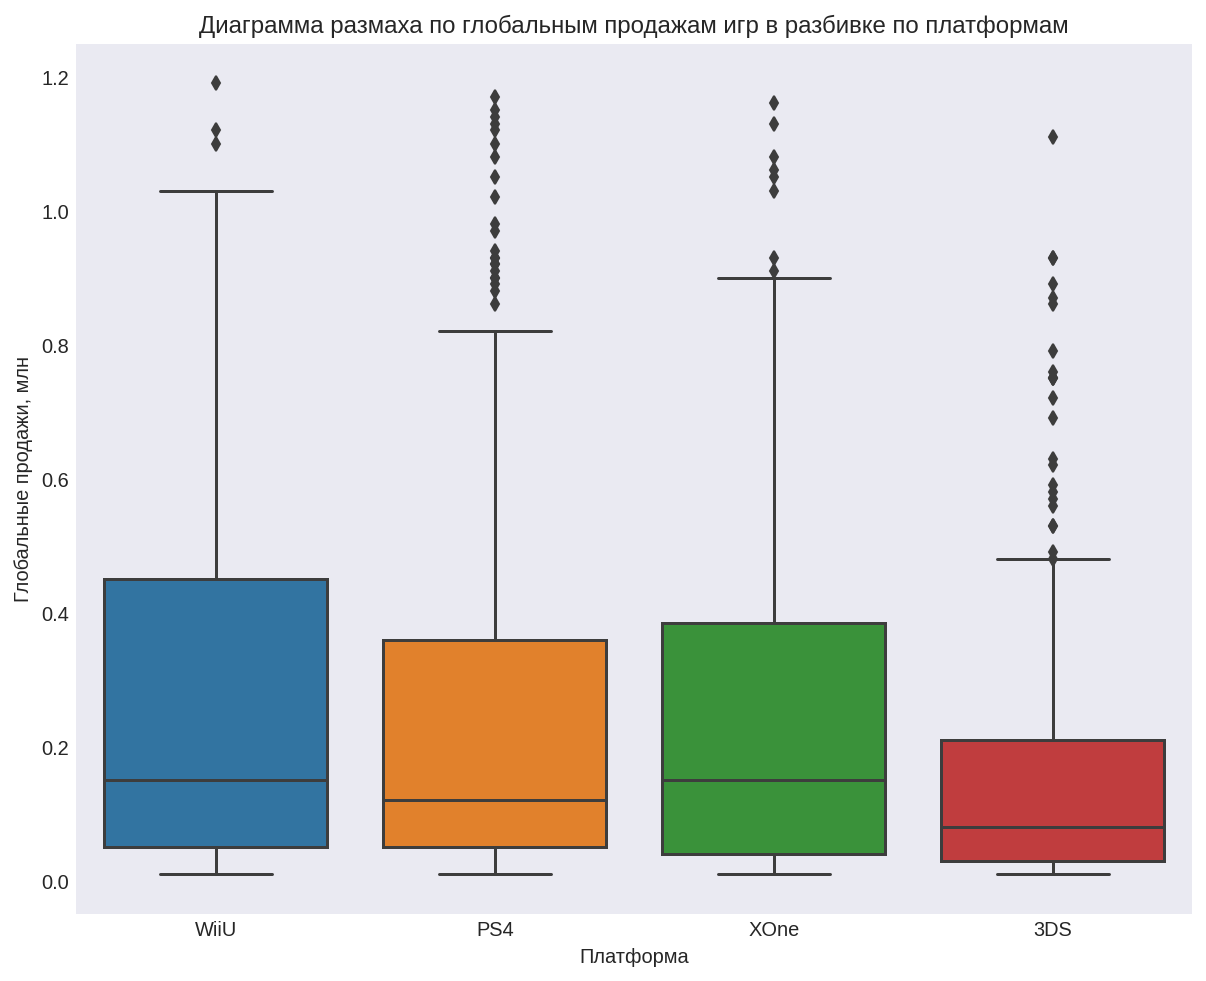

In [30]:
plt.figure(figsize=(10,8))
sns.boxplot(data=games_global, x='platform', y='total_sales')
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи, млн')

**Вывод: медианные значения количества продаж отличаются друг от друга незначительно (за исключением 3DS), колеблются вокруг значения 0.2 млн, среди всех максимальных продаж достигает XOne.**

### Влиянение на продажи отзывов пользователей и критиков.

На примере одной из самых популярных платформ XOne посмотрим, как влияют на продажи отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [31]:
# сделаем срез по датафрейму и выберем только строки с платформой  XOne
xone = games_actual.query('platform == "XOne"')
xone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    int64  
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     169 non-null    float64
 9   user_score       182 non-null    float64
 10  rating           247 non-null    object 
 11  total_sales      247 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 25.1+ KB


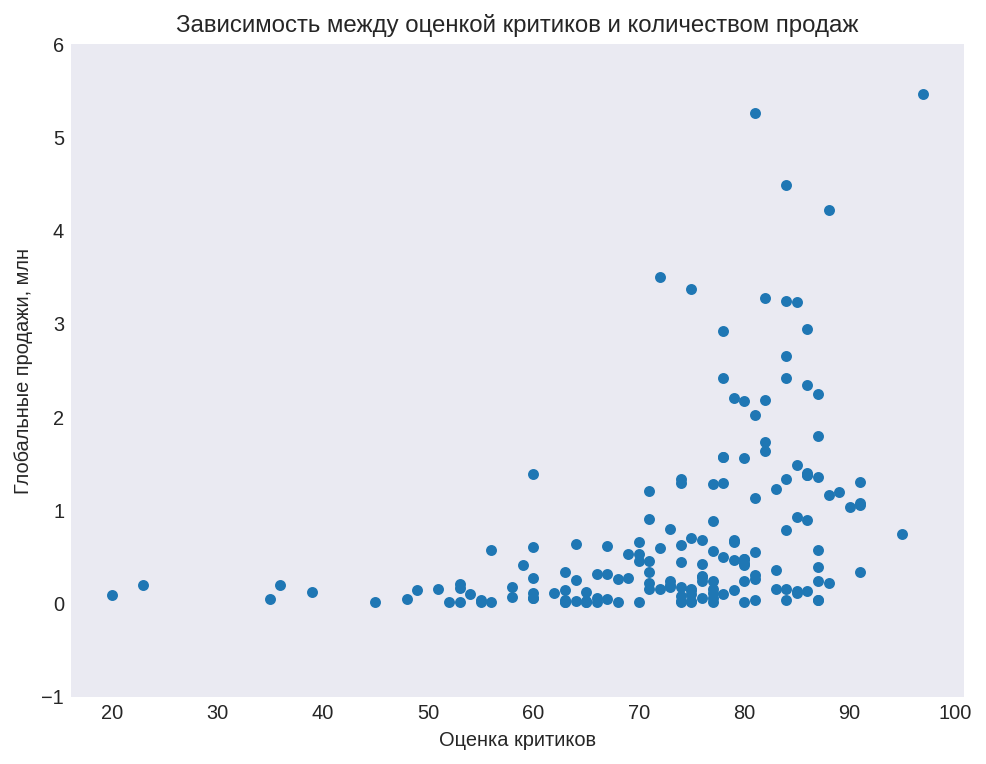

In [32]:
# построим диаграмму рассеяния между оценкой критиков и продажами
xone.plot(x='critic_score', y='total_sales', kind='scatter',\
         title='Зависимость между оценкой критиков и количеством продаж', ylim=(-1,6), figsize=(8, 6))
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи, млн')
plt.show()

In [33]:
xone['critic_score'].corr(xone['total_sales'])

0.4169983280084017

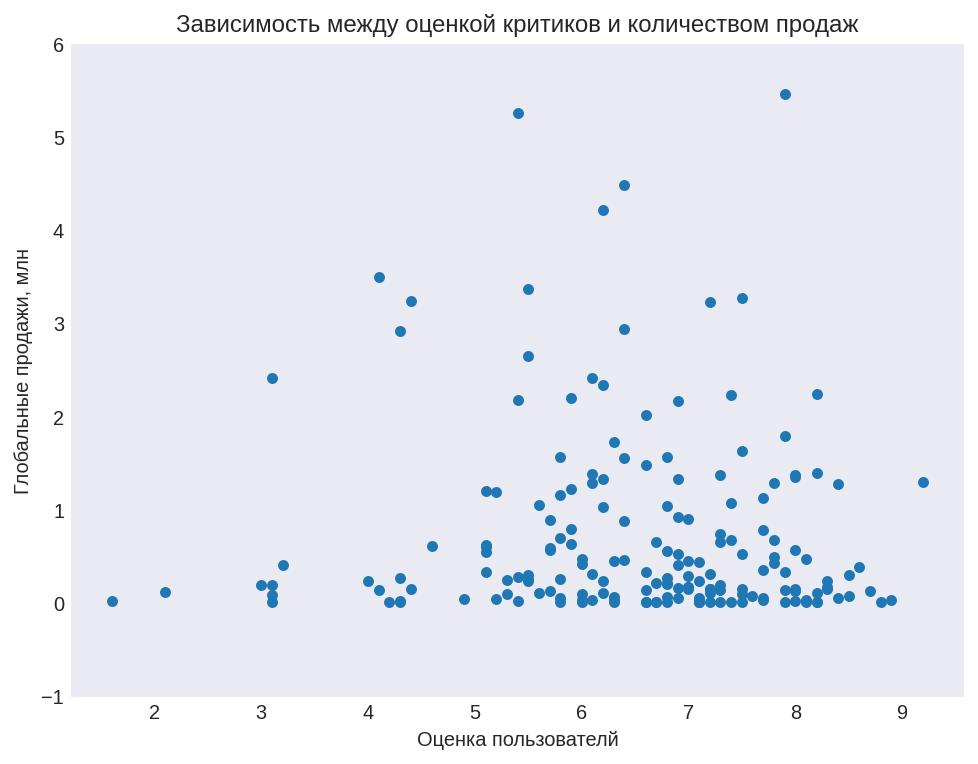

In [34]:
# построим диаграмму рассеяния между оценкой пользователей и продажами
xone.plot(x='user_score', y='total_sales', kind='scatter',\
         title='Зависимость между оценкой критиков и количеством продаж', ylim=(-1,6), figsize=(8, 6))
plt.xlabel('Оценка пользователй')
plt.ylabel('Глобальные продажи, млн')
plt.show()

In [35]:
xone['user_score'].corr(xone['total_sales']) # коэффициент корреляции

-0.06892505328279414

**Вывод: диаграммы рассеяния и коэффициенты корреляции показали, что для XOne есть слабая зависимость продаж от оценки критиков, но от оценки пользователей продажи не зависят.**

Соотнесем выводы с продажами игр на других платформах.

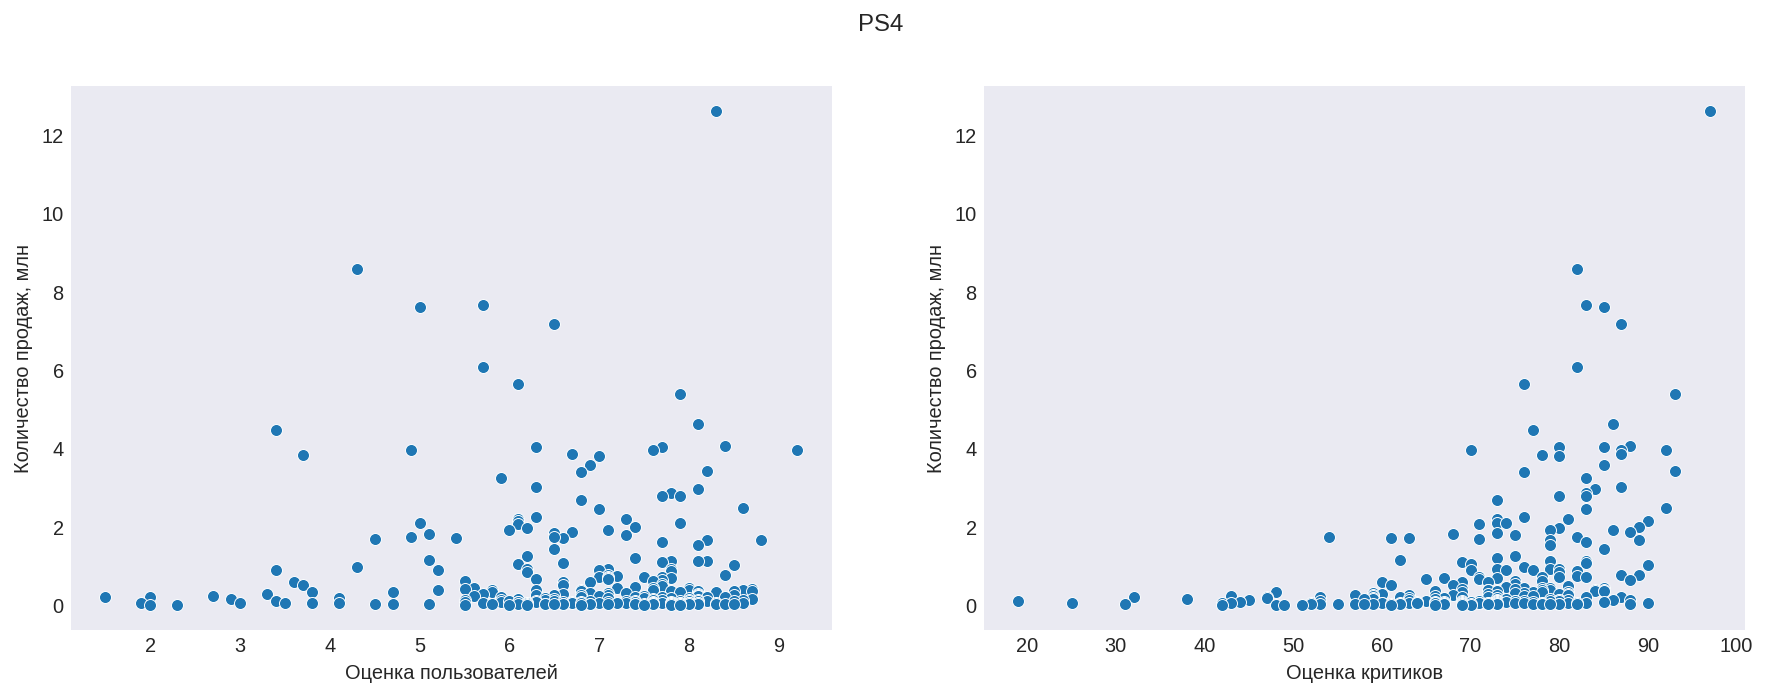

Коэффициент корреляции между оценкой пользователей и продажами -0.031957110204556376
Коэффициент корреляции между оценкой критиков и продажами 0.40656790206178095


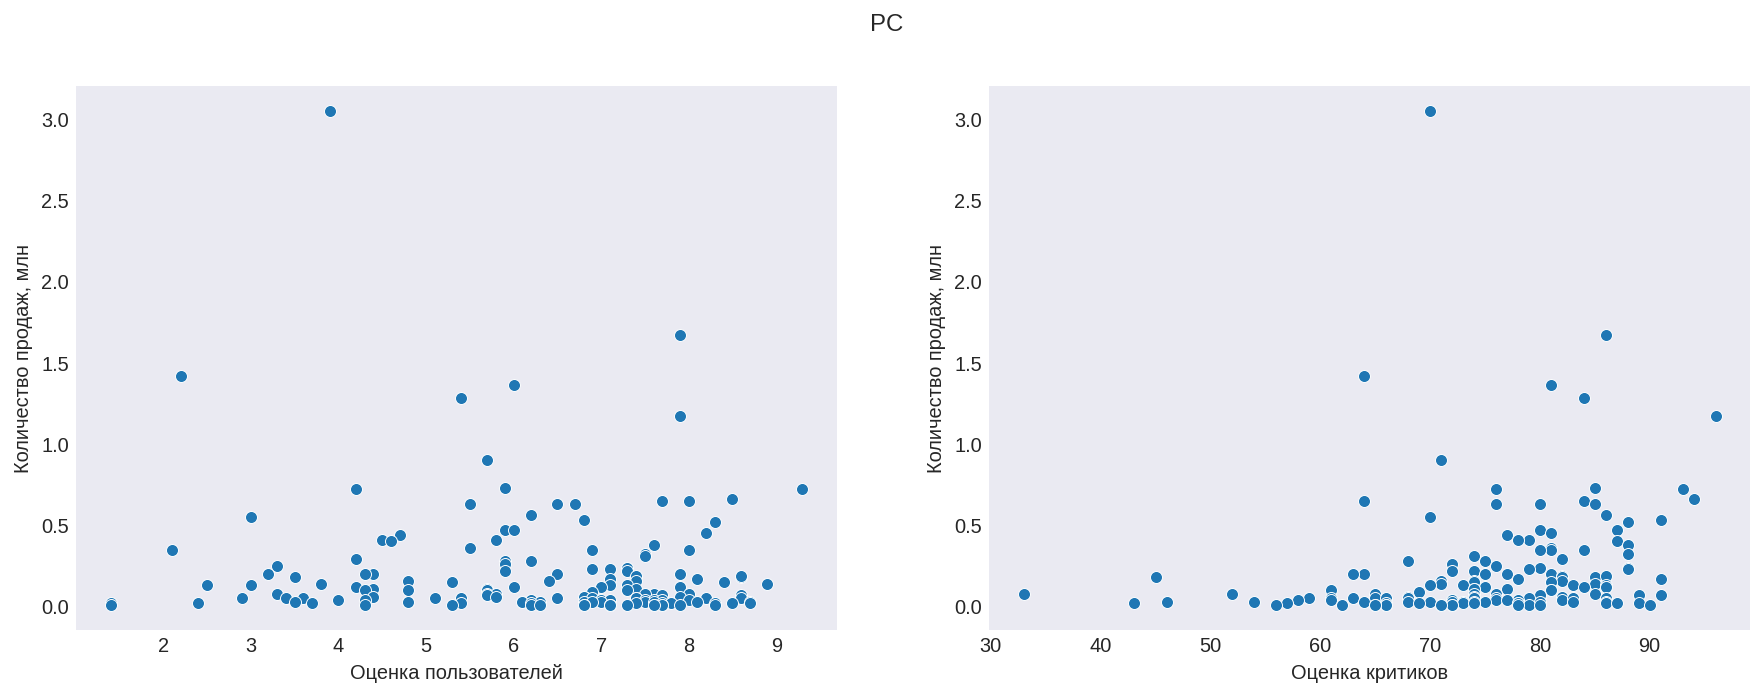

Коэффициент корреляции между оценкой пользователей и продажами -0.0938418695247674
Коэффициент корреляции между оценкой критиков и продажами 0.19603028294369382


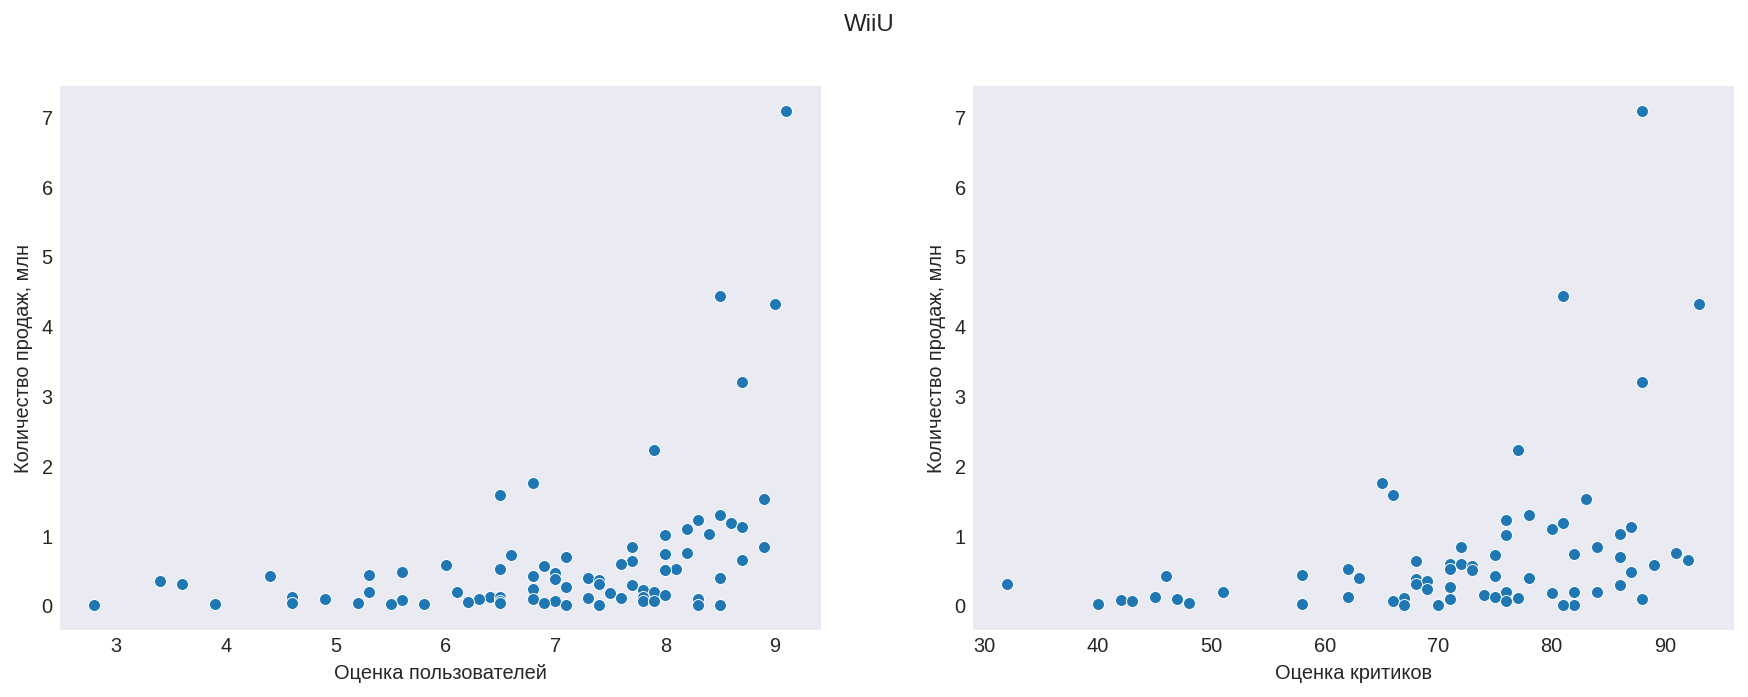

Коэффициент корреляции между оценкой пользователей и продажами 0.4193304819266187
Коэффициент корреляции между оценкой критиков и продажами 0.3764149065423912


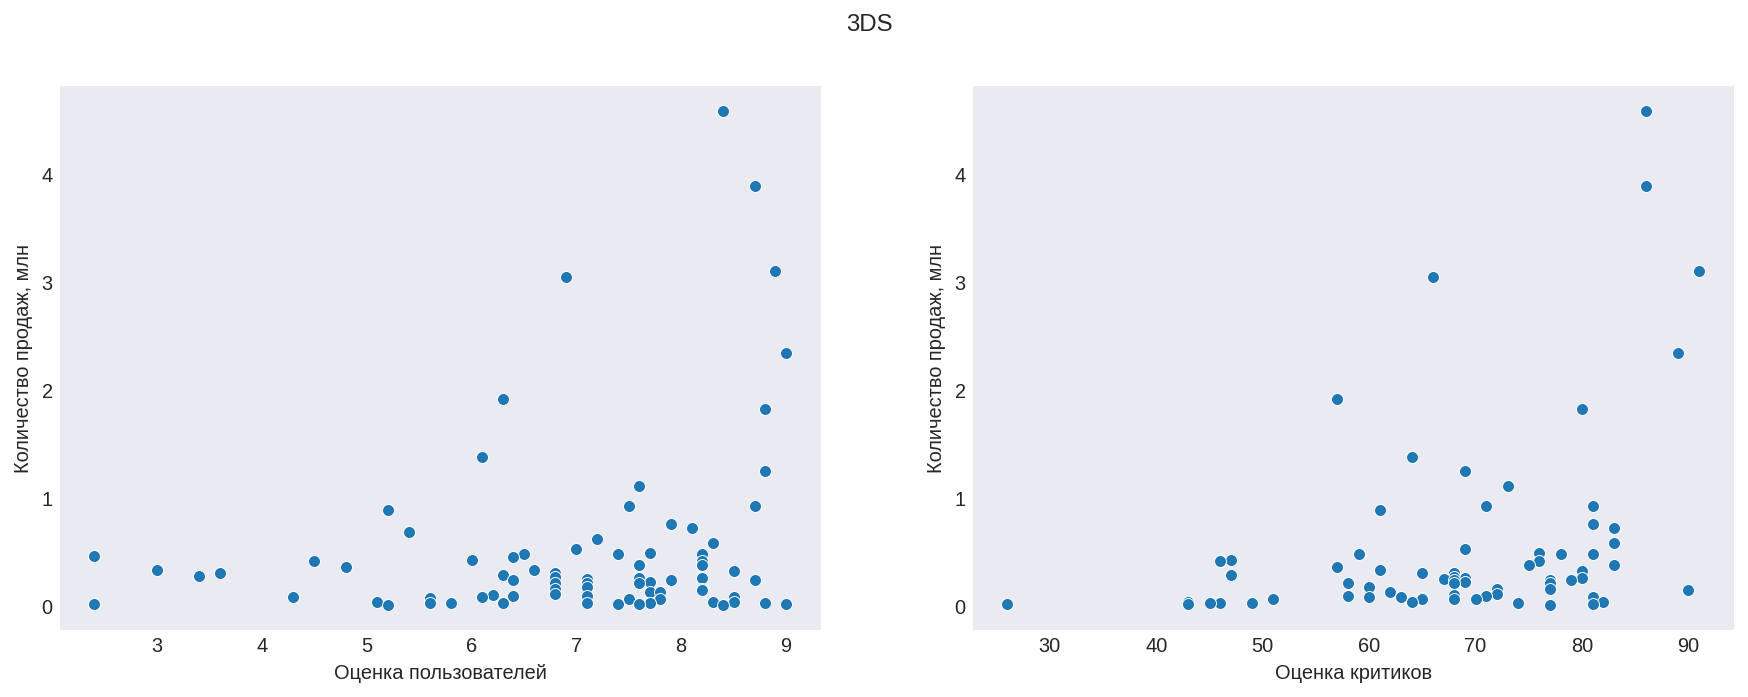

Коэффициент корреляции между оценкой пользователей и продажами 0.24150411773563016
Коэффициент корреляции между оценкой критиков и продажами 0.3570566142288103


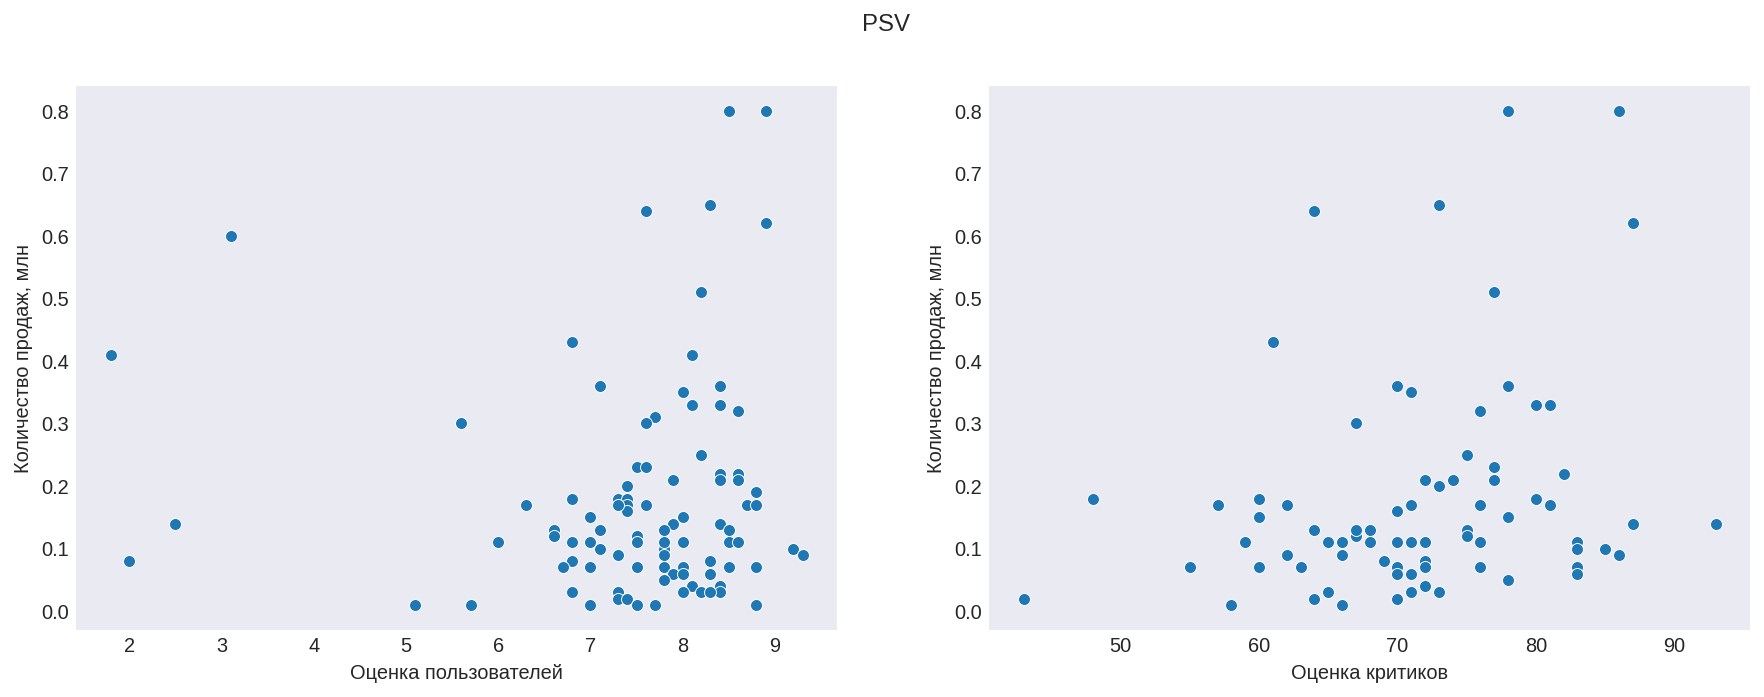

Коэффициент корреляции между оценкой пользователей и продажами 0.0009424723319108626
Коэффициент корреляции между оценкой критиков и продажами 0.2547423503068656


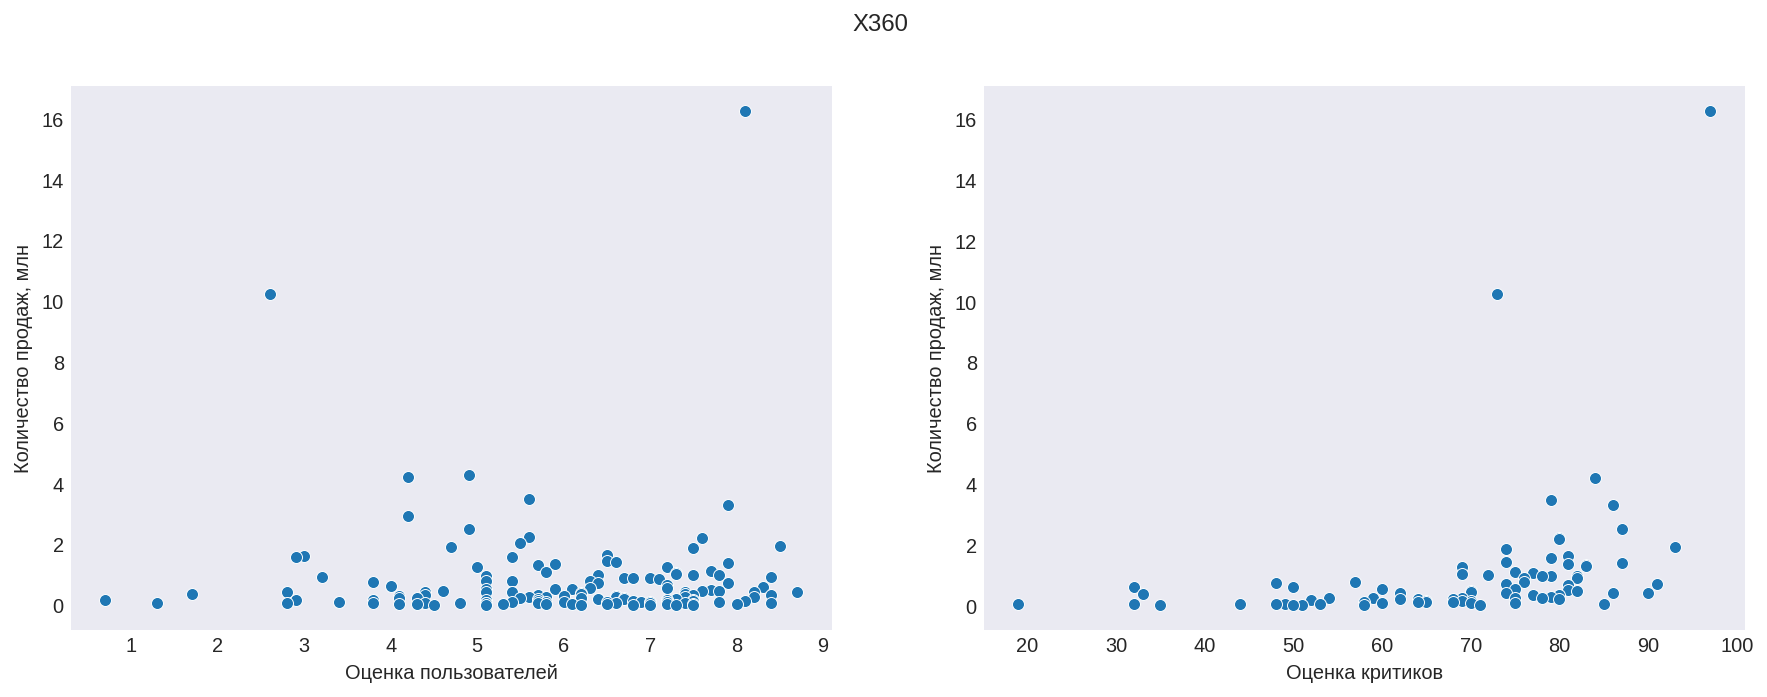

Коэффициент корреляции между оценкой пользователей и продажами -0.011742185147181342
Коэффициент корреляции между оценкой критиков и продажами 0.3503445460228664


In [36]:
# применим цикл для построения диаграмм рассеивания по нескольким платформам
for platform_name in ["PS4", "PC", "WiiU", "3DS", "PSV", "X360"]: # выбираем список платформ
    platform = games_actual.query('platform == @platform_name') # для каждой делаем срез
    fig, ax = plt.subplots(1 ,2, figsize=(15,5)) # поместим два графика рядом
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0]) # строим диаграмму рассеяния для оценки пользователей
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1]) # строим диаграмму рассеяния для оценки критиков
    fig.suptitle(platform_name) # указываем одно название для двух диаграмм, стоящих рядом
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж, млн')
    ax[1].set(ylabel='Количество продаж, млн')
    plt.show()
    user_corr = platform['user_score'].corr(platform['total_sales']) # рассчитываем корреляцию
    critic_cor = platform['critic_score'].corr(platform['total_sales'])
    print(f'Коэффициент корреляции между оценкой пользователей и продажами {user_corr}')
    print(f'Коэффициент корреляции между оценкой критиков и продажами {critic_cor}')

**Вывод: наблюдается прямая слабая зависимость продаж от оценки критиков у PS4, WiiU, 3DS, X360, т.е. чем выше оценка критиков, тем будет больше продаж, а вот от оценки пользователей вообще не зависят продажи.**

### Распределение игр по жанрам

In [37]:
games_genre = games_actual.groupby('genre')['total_sales']
games_genre.describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


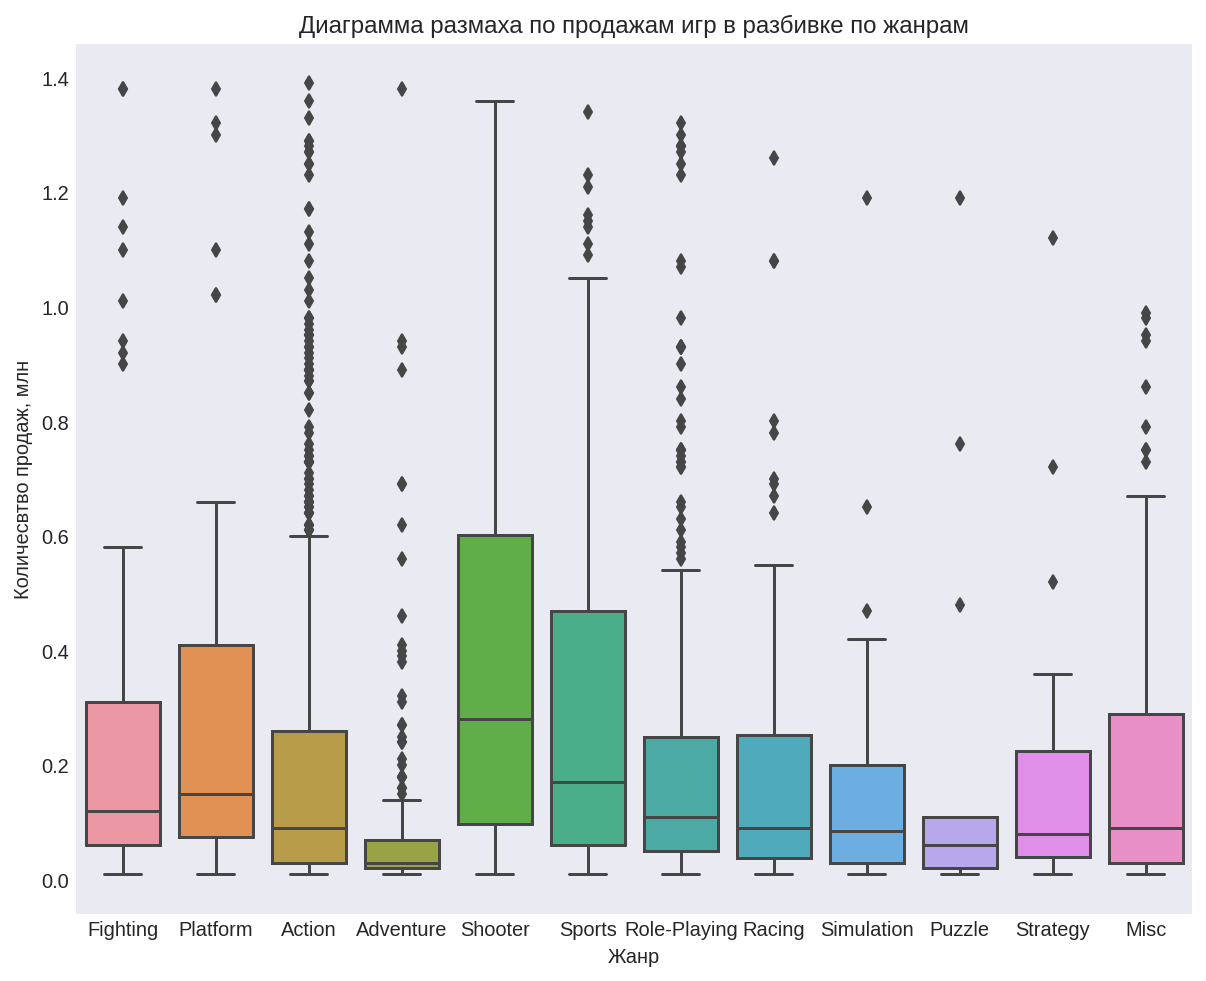

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(data=games_actual.query('total_sales < 1.4'), x='genre', y='total_sales')
plt.title('Диаграмма размаха по продажам игр в разбивке по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количесвтво продаж, млн')
plt.show()

**Вывод: самые прибыльные игры в жанре Shooter, а также Sports, игры в жанре Action много продаются, но приносят меньше прибыли, наименее прибыльные игры в жанрах Adventure и Puzzle.**

## Портрет пользователя каждого региона

### Северная Америка

#### Самые популярные платформы (топ-5)

In [39]:
games_pl_na = games_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)
games_pl_na

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [40]:
games_pl_na.columns = ['na_sales_sum']

In [41]:
# выберем первые пять
games_pl_na_top = games_pl_na.query('na_sales_sum > 38')
games_pl_na_top

,na_sales_sum
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


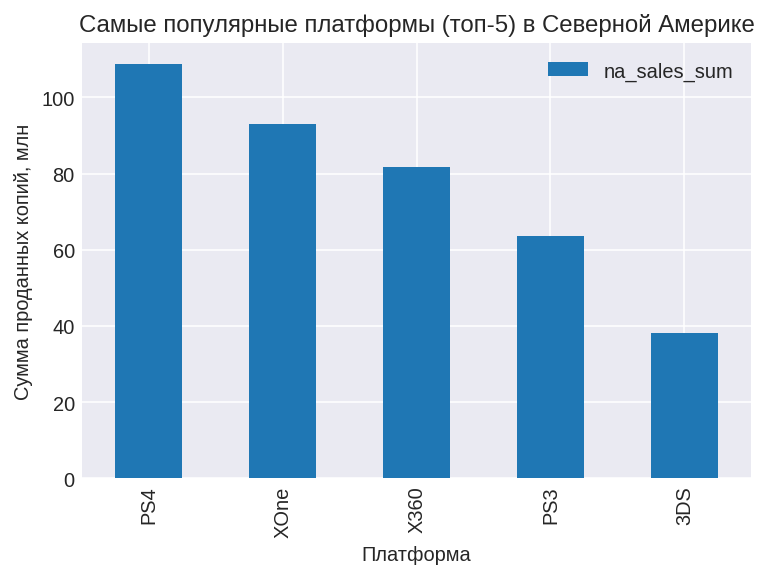

In [42]:
games_pl_na_top.plot(kind='bar', grid=True)
plt.title('Самые популярные платформы (топ-5) в Северной Америке')
plt.ylabel('Сумма проданных копий, млн')
plt.xlabel('Платформа')
plt.show()

**Самые популярные платформы по продажам в Северной Америке: PS4, XOne, X360, PS3, 3DS**

#### Самые популярные жанры (топ-5)

In [43]:
games_genre_na = games_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)
games_genre_na

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [44]:
games_genre_na.columns = ['na_sales_sum']

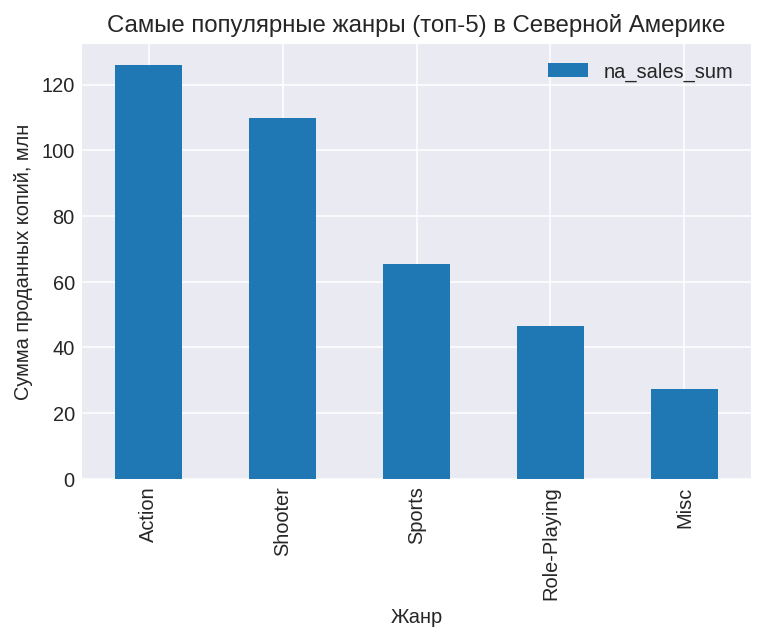

In [45]:
# выберем первые пять
games_genre_na.query('na_sales_sum > 27').plot(kind='bar', grid=True)
plt.title('Самые популярные жанры (топ-5) в Северной Америке')
plt.ylabel('Сумма проданных копий, млн')
plt.xlabel('Жанр')
plt.show()

**Самые популярные жанры по продажам в Северной Америке: Action, Schooter, Sports, Role-Playing, Misc**

#### Влияние рейтинга ESRB на продажи

In [46]:
games_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)

,na_sales
rating,
M,165.21
unknown,89.42
E,79.05
E10+,54.24
T,49.79


**Наиболее популярный рейтинг M (от 17 лет)**

**Портрет пользователя в Северной Америке: 17-летний игрок на последней или предпоследней версии PlayStation или XBox, предпочитающий Action или Shooter.**

### Европа

#### Самые популярные платформы (топ-5)

In [47]:
games_pl_eu = games_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)
games_pl_eu

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


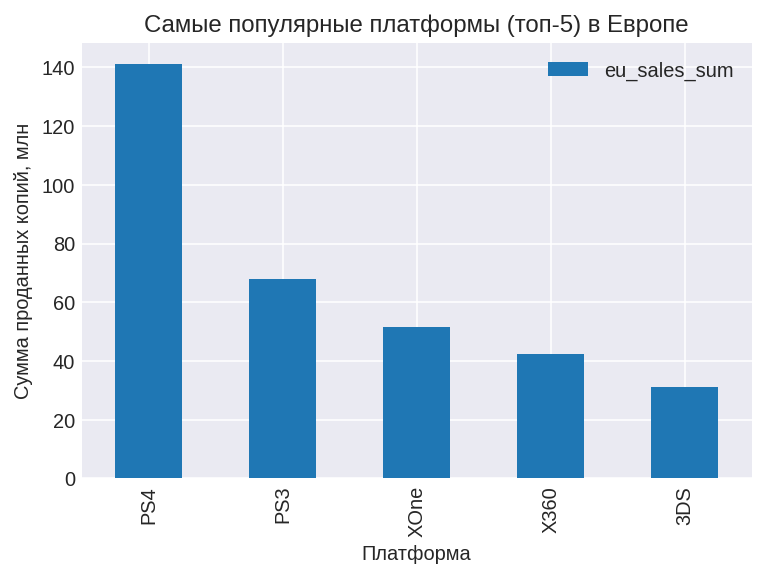

In [48]:
games_pl_eu.columns = ['eu_sales_sum']
games_pl_eu.head().plot(kind='bar', grid=True)
plt.title('Самые популярные платформы (топ-5) в Европе')
plt.ylabel('Сумма проданных копий, млн')
plt.xlabel('Платформа')
plt.show()

**Самые популярные платформы по продажам в Европе: PS4, PS3, XOne, X360, 3DS**

#### Самые популярные жанры (топ-5)

In [49]:
games_genre_eu = games_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)
games_genre_eu

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


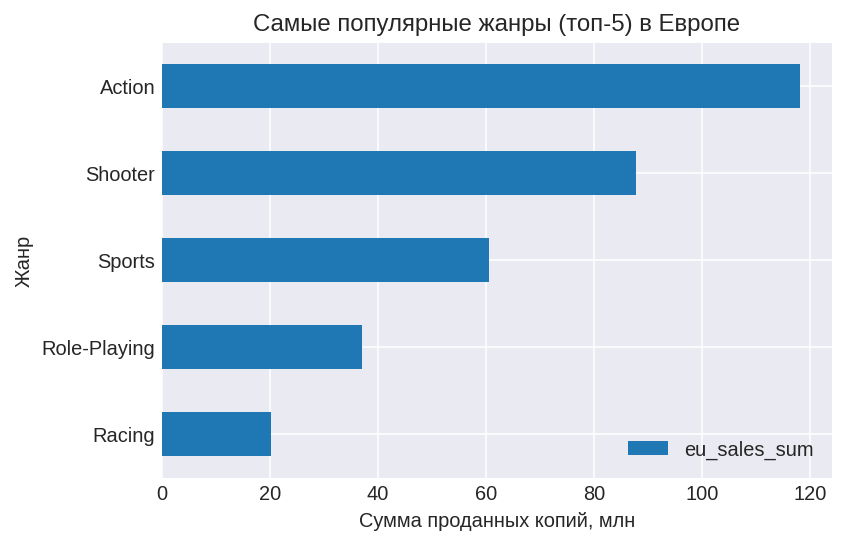

In [50]:
games_genre_eu.columns = ['eu_sales_sum']
# выберем первые пять
games_genre_eu.head().sort_values(by='eu_sales_sum', ascending=True).plot(kind='barh', grid=True)
plt.title('Самые популярные жанры (топ-5) в Европе')
plt.ylabel('Жанр')
plt.xlabel('Сумма проданных копий, млн')
plt.show()

**Самые популярные жанры по продажам в Европе: Action, Schooter, Sports, Role-Playing, Racing**

#### Влияние рейтинга ESRB на продажи

In [51]:
games_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)

,na_sales
rating,
M,165.21
unknown,89.42
E,79.05
E10+,54.24
T,49.79


**Наиболее популярный рейтинг M (от 17 лет)**

**Портрет пользователя в Европе: 17-летний игрок на последней или предпоследней версии PlayStation или XBox, предпочитающий Action**

### Япония

#### Самые популярные платформы (топ-5)

In [52]:
games_pl_jp = games_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)
games_pl_jp

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


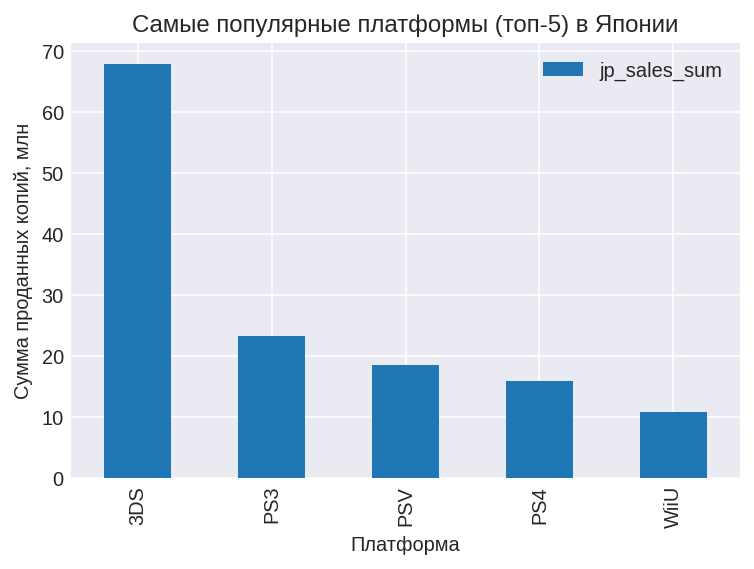

In [53]:
games_pl_jp.columns = ['jp_sales_sum']
games_pl_jp.head().plot(kind='bar', grid=True)
plt.title('Самые популярные платформы (топ-5) в Японии')
plt.ylabel('Сумма проданных копий, млн')
plt.xlabel('Платформа')
plt.show()

**Самые популярные платформы по продажам в Японии: 3DS, PS3, PSV, PS4, WiiU. Логично, что 3DS на первом месте 
в Японии, т.к. она там и была выпущена.**

#### Самые популярные жанры (топ-5)

In [54]:
games_genre_jp = games_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)
games_genre_jp

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


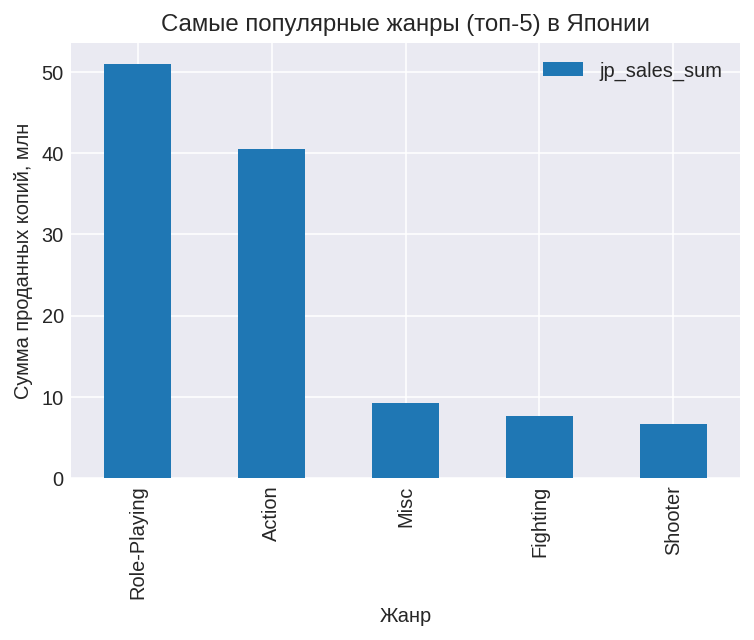

In [55]:
games_genre_jp.columns = ['jp_sales_sum']
# выберем первые пять
games_genre_jp.head().plot(kind='bar', grid=True)
plt.title('Самые популярные жанры (топ-5) в Японии')
plt.ylabel('Сумма проданных копий, млн')
plt.xlabel('Жанр')
plt.show()

**Самые популярные жанры по продажам в Японии: Role-Playing, Action, Misc, Fighting, Shooter.**

#### Влияние рейтинга ESRB на продажи

In [56]:
games_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)

,jp_sales
rating,
unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


**Не можем точно определить наиболее популярный рейтинг ESRB, т.к. большинство игр, которыми увлекаются японцы, выпускаются без указания этого рейтинга, среди игр с указанием рейтинга лидирует T (для лиц от 13 лет)**

**Портрет пользователя в Японии: игрок на DS, предпочитающий Role-Playing**

**Общий вывод по трем регионам:**
1. платформы: 
 - в Северной Америке: PS4, XOne, X360, PS3, 3DS
 - в Европе: PS4, PS3, XOne, X360, 3DS
 - в Японии: 3DS, PS3, PSV, PS4, WiiU
 
2. жанры:
 - в Северной Америке: Action, Schooter, Sports, Role-Playing, Misc
 - в Европе: Action, Schooter, Sports, Role-Playing, Racing
 - в Японии: Role-Playing, Action, Misc, Fighting, Shooter

3. рейтинг ESRB для Северной Америки и Европы: M (от 17 лет), а для Японии не можем сказать однозначно, т.к.
большинство игр указано без рейтинга ESRB.

Мы видим разницу в использовании платформ в трех регионах, PlayStation разных версий очень популярен,
при этом пользователи Северной Америки и Европы сразу покупают новые версии, тогда как в Японии продолжают пользоваться более старыми версиями, к которым привыкли или покупают старые версии, т.к. с выходом новых, предыдущие версии дешевеют, а вот ХВохая версия, вышедшая после X360, новая версия сразу обогнала по продажам в Америке, а в Европе они не входит в топ-5, в Японии не популярна, зато популярна 3DS. В целом в Америке и Европе используют схожие платформы, 
а в Японии более заметно отличие, даже вошла платформа WiiU, которая не фигурирует среди лидеров 
в Америке и Европе. 

Что касается жанров, также интересное наблюдение, что настолько популярный в Европе и Америке Action 
в Японии уступает место другому жанру Role-Playing. При этом американцы и европейцы сходны в жанровых предпочтениях.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

Нулевая гипотеза: средние значения `user_score` для платформ XOne и PC равны.

Альтернативная гипотеза: средние значения `user_score` для платформ XOne и PC не равны.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() сначала выборку со значениями `user_score` для платформы XOne, затем выборку со значениями `user_score` для платформы PC. В качестве alternative по умолчанию — `'two-sided'` (двусторонняя).

In [57]:
# подготовим две выборки по каждой платформе и исключим пропуски в столбцах user_score
games_xone = games_actual.query('platform == "XOne" and user_score.isna() not in user_score')
games_pc = games_actual.query('platform == "PC" and user_score.isna() not in user_score')

In [58]:
alpha = 0.05 # уровень статистической значимости

results_user_score = st.ttest_ind(games_xone['user_score'], games_pc['user_score'])
print('p-значение:', results_user_score.pvalue)

p-значение: 0.14012658403611647


In [59]:
if results_user_score.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


In [60]:
# рассчитаем средние значения оценок пользователей для этих платформ
(
    games_actual
    .query('platform == "XOne" or platform == "PC"')
    .pivot_table(index='platform', values='user_score')
)

,user_score
platform,
PC,6.269677
XOne,6.521429


**Вывод: средние значения оценок пользователей отличаются у платформ Xbox One и PC**

### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: средние значения `user_score` для жанров Action и Sports равны.

Альтернативная гипотеза: средние значения `user_score` для жанров Action и Sports не равны.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() сначала выборку
со значениями `user_score` для жанра Action, затем выборку со значениями `user_score` для жанра Sports. 
В качестве alternative по умолчанию — `'two-sided'` (двусторонняя).

In [61]:
# подготовим две выборки по каждому жанру и исключим пропуски в столбцах user_score
games_action = games_actual.query('genre == "Action" and user_score.isna() not in user_score')
games_sports = games_actual.query('genre == "Sports" and user_score.isna() not in user_score')

In [62]:
results_genre = st.ttest_ind(games_action['user_score'], games_sports['user_score'])
print('p-значение:', results_genre.pvalue)

p-значение: 1.0517832389140023e-27


In [63]:
if results_genre.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


In [64]:
# рассчитаем средние значения оценок пользователей для этих жанров
(
    games_actual
    .query('genre == "Action" or genre == "Sports"')
    .pivot_table(index='genre', values='user_score')
)

,user_score
genre,
Action,6.837532
Sports,5.238125


**Вывод: отвергаем нулевую гипотезу о том, что 
средние значения оценок пользователей для жанров Action и Sports равны в пользу альтернативной, что они не равны.**

<div class="alert alert-danger" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
Аналогично про актуальный период и пропуски.
</div>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.3</b> 
    
👍 

</div>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
* Правильно, что для тестирования гипотез использован двусторонний t-тест Стьюдента.


</div>

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Также можно вывести не только pvalue, но еще и средние значения выборок, которые мы изучаем. Это позволит нам проверить не ошиблись ли мы, если они расходятся с тестом Стьюдента.
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Комментарий студента</b> 
    
Учтено, изменено
</div>

## Общий вывод

**Целью** проекта было выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для реализации этой цели был предоставлен файл с данными по играм за период с 1980 по 2016 годы 
с количеством продаж в разных регионах мира, различными платформами и рейтингами.

Прежде, чем приступать к анализу данных необходимо было провести их **предобработку**. Были изменены названия столбцов, добавлен дополнительны столбец с общим числом продаж по всем регионам, типы данных приведены к более корректным и подходящим для проведения анализа, а также были пропуски в значениях (некоторые пришлось удалить, их число составило не более 2% от общего количества. Чтобы не потерять важные данные, связанные с рейтингом ESRB, заменили пропущенные значения на unknown, чтобы учесть все игры при последующем анализе.

На основании **исследовательского анализа данных** были сделаны следующие выводы:
- в 80-егоды игровая индустрия была очень слабо развита, в 90-х постепенно начала расти: с 1993 по 1995 годы количество игр ежегодноо увеличивалось в два раза и продолжало расти до 1998 года, в 1999 и 2000 был небольшой спад, в 2002 был огромный скачок, невероятный по сравнению с 10-летней давностью (если сравнить с 1980 по 1990 и с 1990 по 2000). Самый большой пик развития игр относится к 2008 и 2009 годам, затем постепенно развитие компьютерных игр снижается, думаю, это связано с развитием смартфонов.
- самая популярная платформа PS2, было продано свыше 1,2 млрд копий по всему миру. После этой платформы идет тройка, которые продали от 850 млн до 900 млн копий, к ним относятся: X360, PS3, Wii. Еще две платформы DS и PS не сильно отстали от лидеров (750 - 800 млн копий), при этом заметно выделяются на фоне остальных.
- судя по распределениям шести наиболее популярных платформах, все платформы имееют тенденцию к завершению. Каждая платформа существует несколько лет, к середине своего существования имеет самую большую популярность, а в дальнейшем неминуемо теряет эту популярность и к концу практически нет продаж, на смену приходит новая версия (как в случае с PS2 и PS3). Мы видим, что пик популярности PS2 приходится на 2005 год, а в 2006 резко падает, как раз с появлением PS3 и тогда уже продажи PS3 растут. Некоторые компании стараются держать свой продукт на рынке и после небольшого падения на следующий год продажи возрастают, но обычно всего на год, максимум два. Такую картину мы наблюдаем у DS, PS2, PS3, X360.В итоге DS просуществовала 10 лет, PS - 9 лет, PS2 - 12 лет, PS3 - 10 лет, Wii - 10 лет, X360 - 12 лет. Можем сделать вывод, что даже самые популярные платформы каждые десять лет исчезают и их место занимают новые.
- все платформы имеют тенденцию к падению, но на 2017 год все еще должны быть в лидерах: PS4 и XOne (только у этих двух платформ наблюдался прирост продаж с 2013 по 2015 годы, к тому же они только в 2013 году появились, значит, есть вероятность роста на будущее, а не затухание, если учитывать предыдущее исследование, что успешная компания на рынке держится около 10 лет, возможно падение в 2016 году кратковременное или хотя бы продажи сильно не упадут в будущем).
- медианные значения количества продаж отличаются друг от друга незначительно (за исключением 3DS), колеблются вокруг значения 0.2 млн, среди всех максимальных продаж достигает XOne.
- диаграммы рассеяния и коэффициенты корреляции показали, что наблюдается прямая слабая зависимость продаж от оценки критиков у PS4, WiiU, 3DS, X360, т.е. чем выше оценка критиков, тем будет больше продаж, а вот от оценки пользователей вообще не зависят продажи.
- самые прибыльные игры в жанре Shooter, а также Sports, игры в жанре Action много продаются, но приносят меньше прибыли, наименее прибыльные игры в жанрах Adventure и Puzzle.также Sports и Shooter, а самые низкие продажи среди жанров: Fighting, Simulation, Puzzle, Adventure, Strategy

**Портрет пользователя каждого региона**: 

**платформы:**
   - в Северной Америке: PS4, XOne, X360, PS3, 3DS
   - в Европе: PS3, X360, PS2, PS, PS4
   - в Японии: 3DS, PS3, PSV, PS4, WiiU

**жанры:**

   - в Северной Америке: Action, Schooter, Sports, Role-Playing, Misc
   - в Европе: Action, Schooter, Sports, Role-Playing, Racing
   - в Японии: Role-Playing, Action, Misc, Fighting, Shooter

**рейтинг ESRB** для Северной Америки и Европы: M (от 17 лет), а для Японии не можем сказать однозначно, т.к.
большинство игр указано без рейтинга ESRB.

Мы видим разницу в использовании платформ в трех регионах, PlayStation разных версий очень популярен, при этом пользователи Северной Америки и Европы сразу покупают новые версии, тогда как в Японии продолжают пользоваться более старыми версиями, к которым привыкли или покупают старые версии, т.к. с выходом новых, предыдущие версии дешевеют, а вот ХВохая версия, вышедшая после X360, новая версия сразу обогнала по продажам в Америке, а в Европе они не входит в топ-5, в Японии не популярна, зато популярна 3DS. В целом в Америке и Европе используют схожие платформы, а в Японии более заметно отличие, даже вошла платформа WiiU, которая не фигурирует среди лидеров в Америке и Европе.

Что касается жанров, также интересное наблюдение, что настолько популярный в Европе и Америке Action 
в Японии уступает место другому жанру Role-Playing. При этом американцы и европейцы сходны в жанровых предпочтениях.

**Проверка гипотез:**
- средние значения оценок пользователей отличаются у платформ Xbox One и PC
- отвергаем нулевую гипотезу о том, что средние значения оценок пользователей для жанров Action и Sports равны в пользу альтернативной, что они не равны.

**Таким образом, если делать прогноз на 2017 год: рекомендую развивать игры на платформах PS4 и XOne
в жанре Shooter, т.к. он наиболее прибыльный, если делать прицел на весь глобальный рынок, за исключением Японии, японцы все-таки предпочитают игры на платформе DS и в жанре Role-Playing.**


<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Выводы понятны и логичны, а самое главное подкреплены выявленными фактами. Но, не забудь, пожалуйста, их перепроверить после корректировок.
    
Ты очень серьезно подходишь к визуализации.

Вот пара ссылок на полезные источники:
    
* [Как строить красивые графики на Python с Seaborn](https://habr.com/ru/companies/otus/articles/540526/)
    
* [Seaborn для визуализации данных в Python](https://pythonru.com/biblioteki/seaborn-plot)
</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-success">
<b>Обратная связь v.1</b> 
    
👋
Юлия, хорошая работа, ты мыслишь нестандартно, это отличный навык, который у тебя уже есть, ты последовательна и вдумчива. Твою работу очень интересно читать и проверять.  Я оставил несколько обязательных поправок для тебя и после этого буду готов сразу принять проект. 

Удачи в доработках, жду! 

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Комментарий студента</b> 
    
Вывод откорретирован в соответствии с изменениями в исследованиях
</div>

<div style="border:solid indigo 3px; padding: 20px">
<div class="alert alert-success">
<b>Обратная связь v.2</b> 
    
👋 
      
Юлия, спасибо тебе за исправления критических моментов, а также спасибо за хорошую работу.
    
Поздравляю с успешным завершением проекта 🥳 🎉
    
И желаю успехов в новых работах 😊